## Housing Data Analysis

### Objective:
Our primary objective is to develop a sophisticated predictive model that leverages machine learning techniques to accurately predict house prices. This model will focus on variables such as location, size, and number of bedrooms.​

In [1]:
# import statements

import pandas as pd
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data

data = pd.read_csv('Housing Data.csv')
#data_test = pd.read_csv('test.csv')

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# summary of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


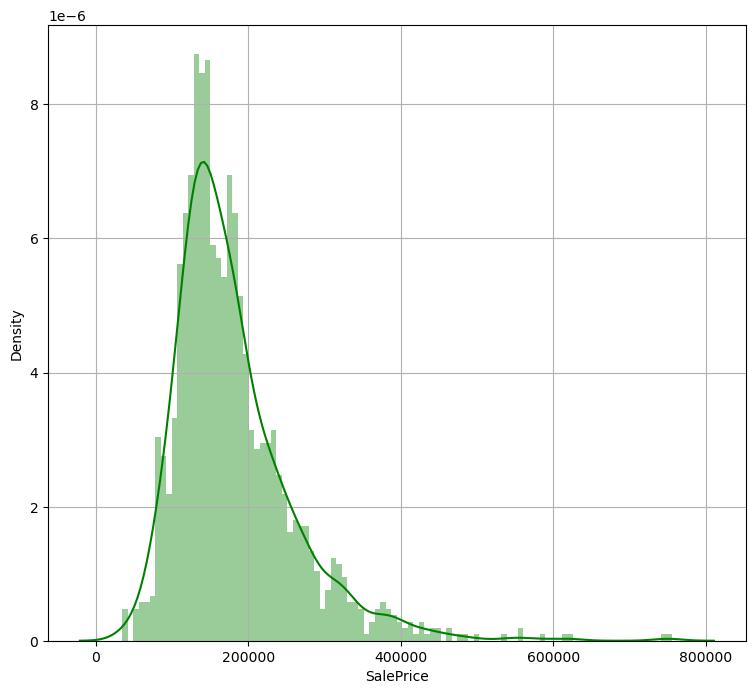

In [5]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.grid(True)

## Numerical Data Dsitribution

In [6]:
# Numerical Features

num_features = data.select_dtypes(include=['int64', 'float64'])
num_features.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


We don't need ID number and Sale Price, so we can drop it

In [7]:
num_features = num_features.drop(columns = ['Id'], axis = 1)

<Figure size 1500x1000 with 0 Axes>

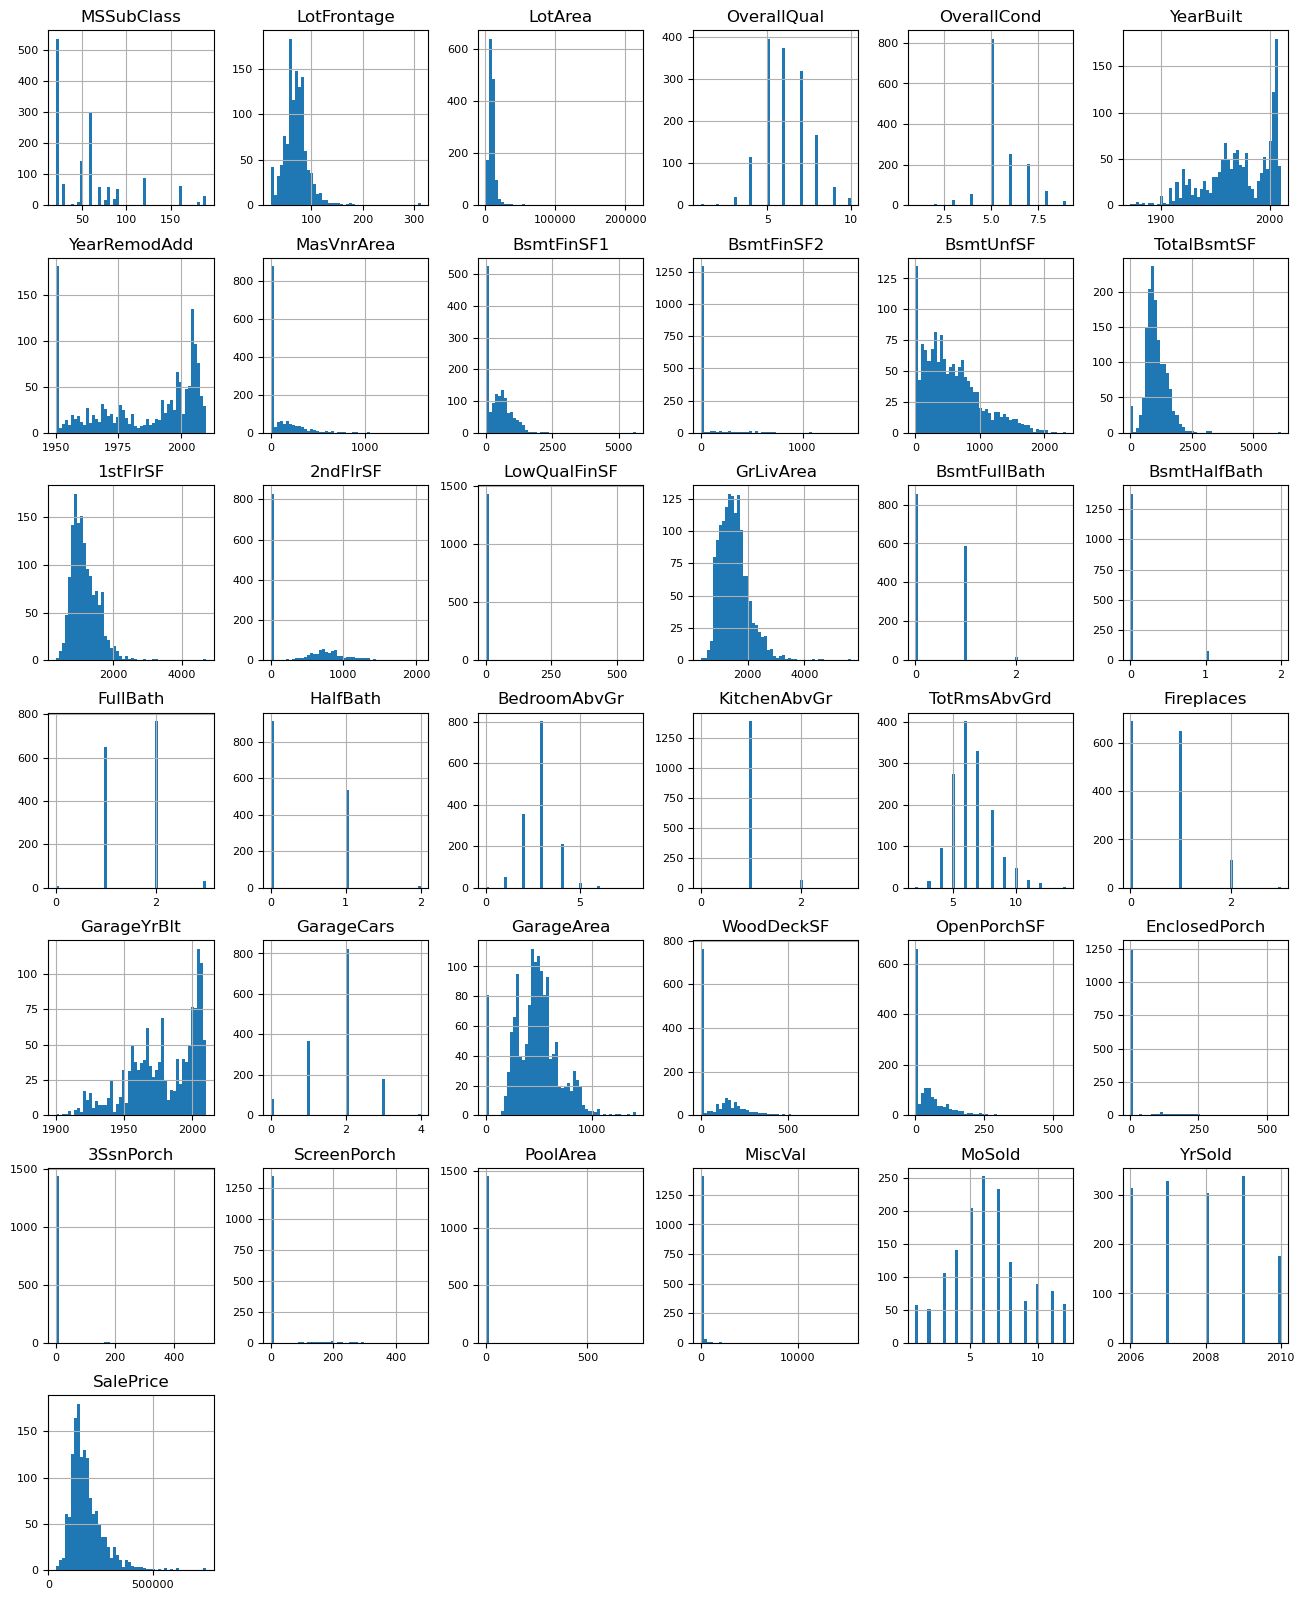

In [8]:
plt.figure(figsize=(15, 10))
num_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.title('Numerical Features Distribution')
plt.show()


In [9]:
num_features.isna().any()

MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [22]:
# drop all the na values

num_features.dropna(inplace=True)

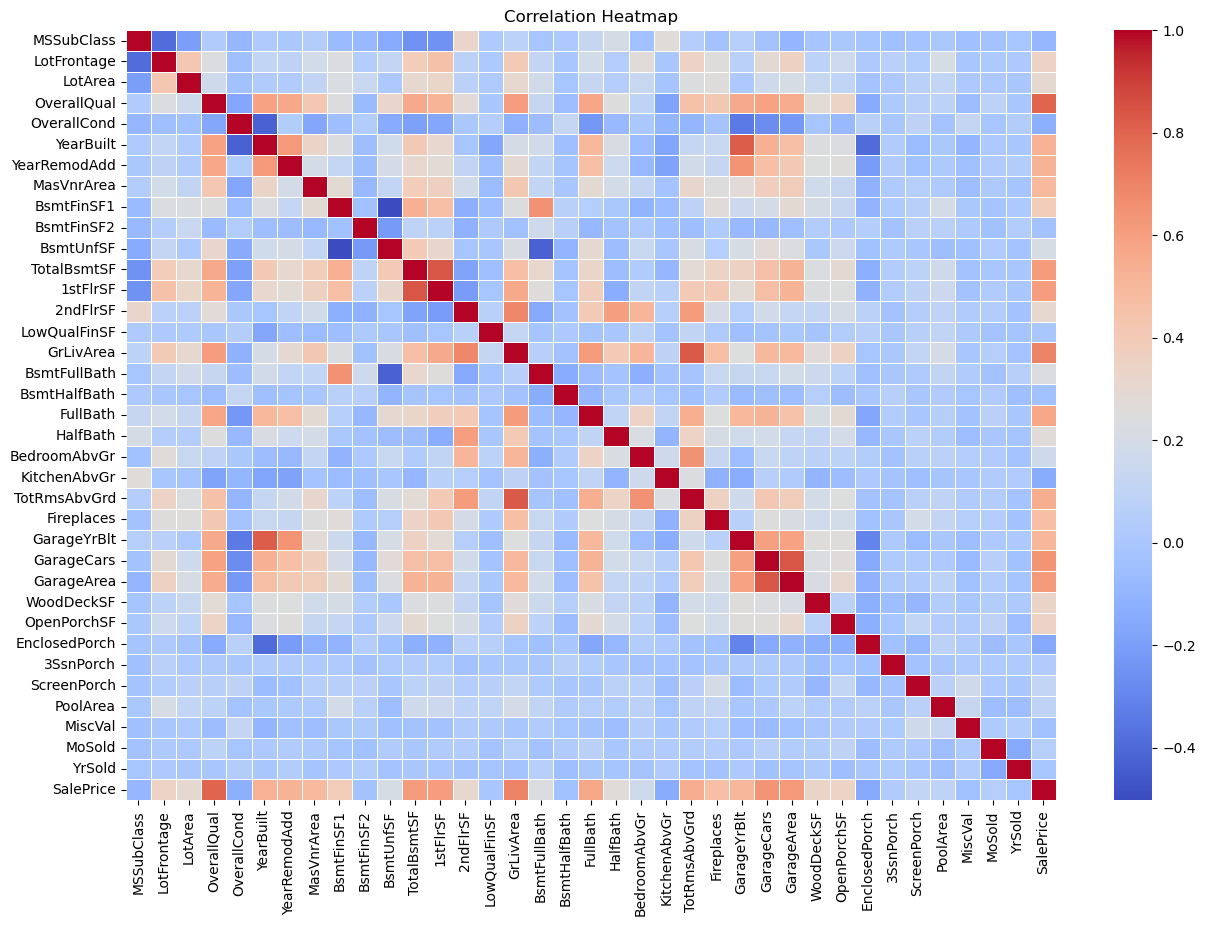

In [11]:
# Correlation Matrix to visualize relationships between features
corr_matrix = num_features.corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Linear Regression

In [12]:
# Features and target variable
X = num_features.drop('SalePrice', axis=1)
y = num_features['SalePrice']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1588229760.7292979
R-squared: 0.798635079573666


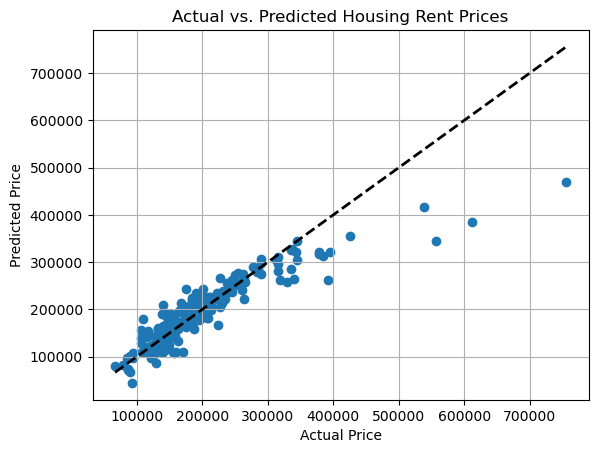

In [13]:
# Plotting actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Rent Prices")
plt.grid(True)
plt.show()

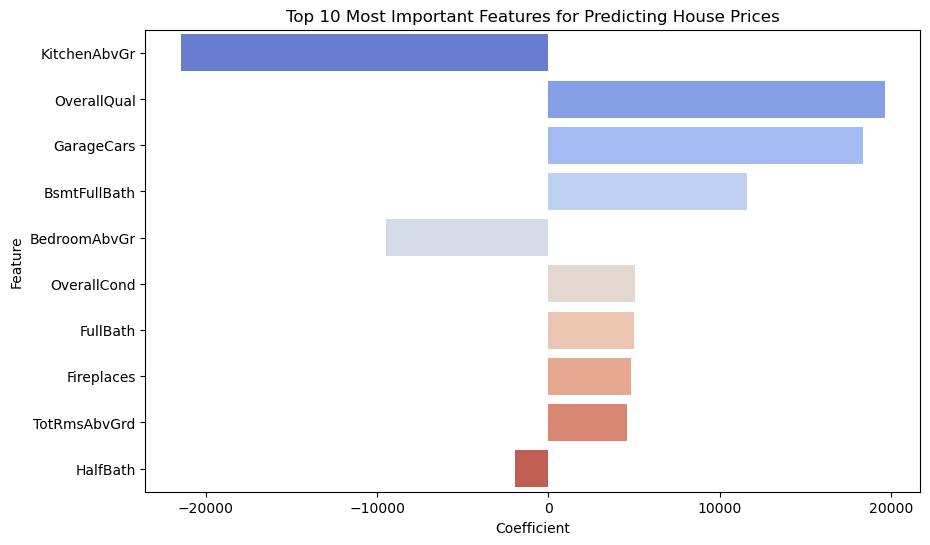

In [14]:
# Extracting feature names and coefficients
feature_names = X.columns
coefficients = model.coef_

# Creating a DataFrame to hold feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the features by the absolute values of their coefficients in descending order
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(10), palette='coolwarm')
plt.title('Top 10 Most Important Features for Predicting House Prices')
plt.show()

## Multiple Regression

In [15]:
numeric_df = data.select_dtypes(include=[np.number])
numeric_df.fillna(numeric_df.median(), inplace=True)
correlation_matrix = numeric_df.corr()
top_3_features = correlation_matrix['SalePrice'].apply(lambda x: abs(x)).sort_values(ascending=False)[1:4].index.tolist()

X = numeric_df[top_3_features]
y = numeric_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 1851765974.97
R^2 Score: 0.76


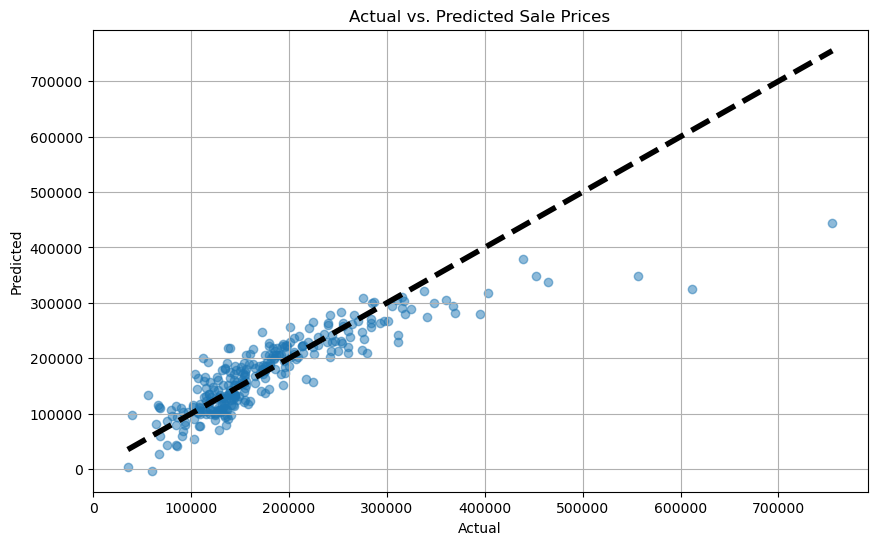

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sale Prices')
plt.grid(True)
plt.show()


## Random Forest Regressor

In [17]:
# Selecting features and target variable
X = data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'BedroomAbvGr']]
y = data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Random Forest Regression):", mse)
print("R-squared (Random Forest Regression):", r2)

Mean Squared Error (Random Forest Regression): 890220973.82192
R-squared (Random Forest Regression): 0.8839396200662523


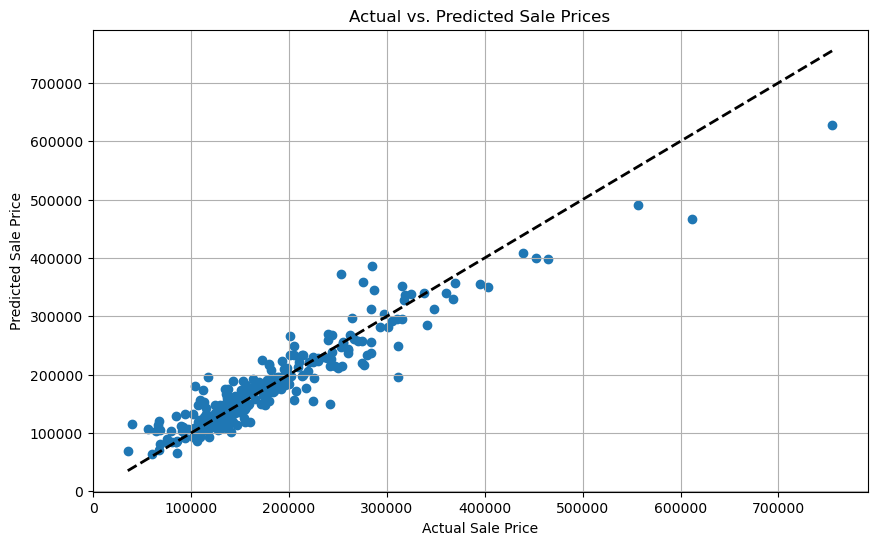

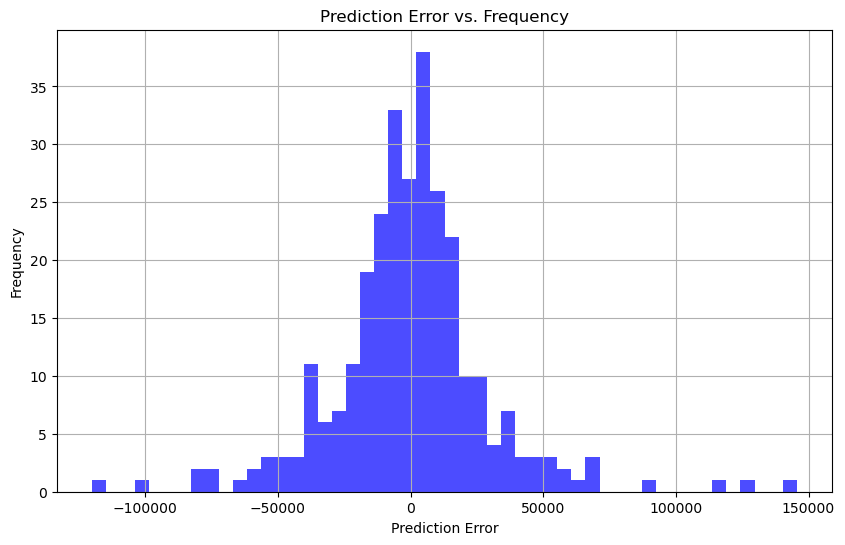

In [18]:
# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.grid(True)
plt.show()

# Plotting prediction error vs. frequency
prediction_errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(prediction_errors, bins=50, color='blue', alpha=0.7)
plt.title('Prediction Error vs. Frequency')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Modified Random Forest Regressor

In [19]:
# Selecting features and target variable
# X = data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'BedroomAbvGr']]
X = data[['GrLivArea', 'YearBuilt', 'BedroomAbvGr']]
y = data['SalePrice']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Random Forest Regressor
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)
# Making predictions
y_pred = model_forest.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Random Forest Regression):", mse)
print("R-squared (Random Forest Regression):", r2)

Mean Squared Error (Random Forest Regression): 1216173957.2932475
R-squared (Random Forest Regression): 0.8414442978769681


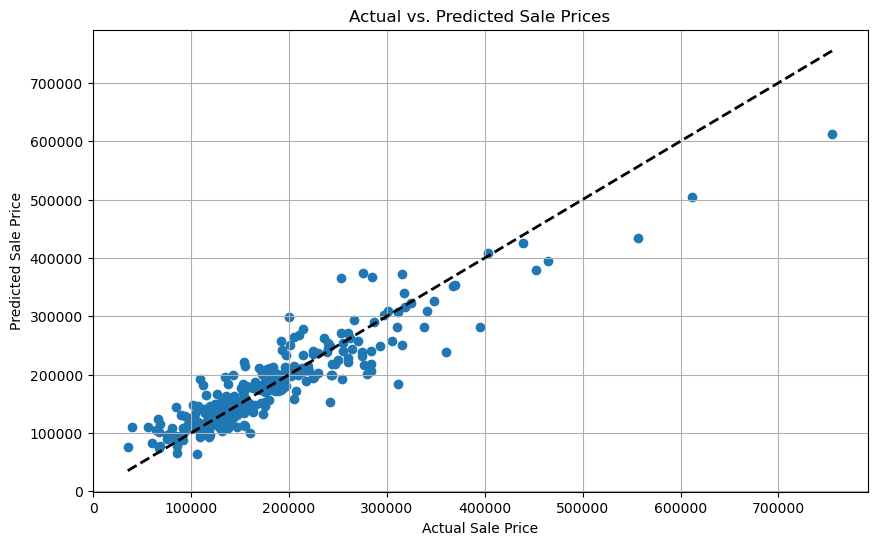

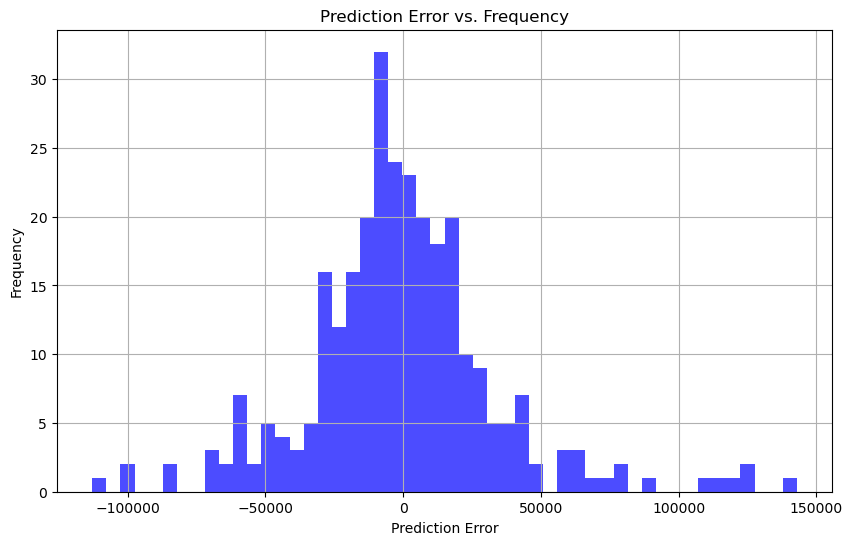

In [20]:
# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.grid(True)
plt.show()
# Plotting prediction error vs. frequency
prediction_errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(prediction_errors, bins=50, color='blue', alpha=0.7)
plt.title('Prediction Error vs. Frequency')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# Function to take user input and predict housing price
def predict_housing_price():
    # Get user input for features
    num_bedrooms = int(input('Enter the number of bedrooms: '))
    size_sqft = float(input('Enter the living room size in square feet: '))
    year_built = int(input('Enter the year in which the house was built: '))
    # Predict housing price
    predicted_price = model_forest.predict([[num_bedrooms, size_sqft, year_built]])
    print('Predicted housing price:', predicted_price[0])
# Call the function to predict housing price based on user input
predict_housing_price()

Enter the number of bedrooms:  2
Enter the living room size in square feet:  1500
Enter the year in which the house was built:  2020


Predicted housing price: 69664.5
